In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb
import catboost as CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [12]:
#cb.CatBoostRegressor?

In [13]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [14]:
#Learning curve 
import time
from datetime import timedelta
start_time = time.monotonic()

In [15]:
train_sizes = np.linspace( 0.1, 1.0, 2)

In [16]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=regressor,
    X=x_train, # your training features
    y=y_train, # your training labels
    cv=5, # number of cross-validation folds
    scoring='neg_mean_squared_error', # evaluation metric
    n_jobs=-1 # use all available CPUs
)

In [17]:
# Compute mean and standard deviation for training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

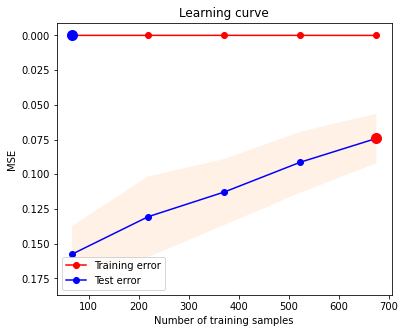

In [18]:
import matplotlib.pyplot as plt
# Plot learning curve
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean,'o-', color="r", label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color="b", label='Test error')

# Draw standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, )
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend
plt.xscale('linear')
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.plot(train_sizes[test_mean.argmin()], test_mean.min(), 'o', markersize=10, color='red')
plt.plot(train_sizes[train_mean.argmin()], train_mean.min(), 'o', markersize=10, color='b')
plt.show()

In [19]:
# Train model on training data
regressor.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)

In [20]:
#IterTION CURVE 
# Get the error values for each iteration on both train and test set
train_error = regressor.evals_result_['learn']['RMSE']
test_error = regressor.evals_result_['validation']['RMSE']

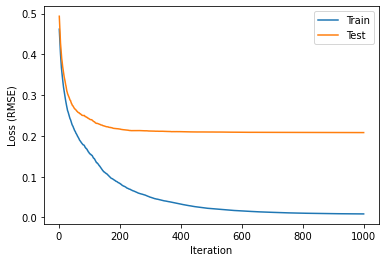

In [26]:
# Plot the error iteration curve for both train and test set

plt.plot(np.arange(1, len(train_error)+1), train_error, label='Train')
plt.plot(np.arange(1, len(test_error)+1), test_error, label='Test')
plt.xlabel('Iteration')
plt.ylabel('Loss (RMSE)')
plt.legend()
plt.show()

In [27]:
#Fixing learning rate with different with learning curve 
# Define learning rates to try
learning_rates = [0.001, 0.0015, 0.01, 0.015, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 
                  0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

In [28]:
# Initialize lists to store RMSE values for train and test sets
train_rmse = []
test_rmse = []

In [29]:
# Iterate over learning rates
for lr in learning_rates:
    # Create CatBoostRegressor model
    model = cb.CatBoostRegressor(loss_function='RMSE', depth=8, l2_leaf_reg = 3, iterations=1000, learning_rate=lr, random_state=42)

    # Train model on training data
    model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=False)

    # Get RMSE values for train and test sets
    train_pred = model.predict(x_train)
    train_rmse.append(np.sqrt(np.mean((train_pred - y_train)**2)))
    test_pred = model.predict(x_test)
    test_rmse.append(np.sqrt(np.mean((test_pred - y_test)**2)))

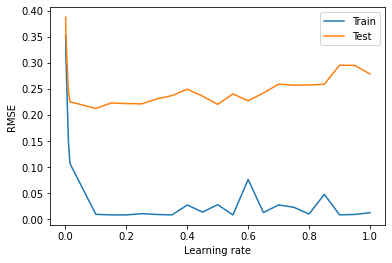

In [34]:
# Plot learning curve
plt.plot(learning_rates, train_rmse, label='Train')
plt.plot(learning_rates, test_rmse, label='Test')
plt.xscale('linear')
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [35]:
r2_scores = []
r2_scores1 = []
for lr in learning_rates:
    model = cb.CatBoostRegressor(learning_rate=lr, iterations=1000, depth=8, l2_leaf_reg = 3,random_state=42, verbose=False)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred1 = model.predict (x_train)
    r2_scores.append(r2_score(y_test, y_pred))
    r2_scores1.append(r2_score(y_train, y_pred1))

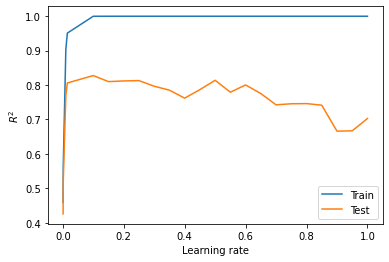

In [36]:
plt.semilogx(learning_rates, r2_scores1, label='Train')
plt.semilogx(learning_rates, r2_scores, label='Test')
plt.yscale('linear')
plt.xscale('linear')
plt.xlabel('Learning rate')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

In [28]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:30:25.125000


In [29]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612
